In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:\\Users\\Ram Suthar\\Downloads\\MRF.NS.csv')
company_name = ["MRF"]

print(df.tail(10))

            Date           Open           High            Low          Close  \
1224  2023-07-31  102270.000000  103298.851563  102100.000000  102956.250000   
1225  2023-08-01  102507.148438  103570.953125  102507.148438  103285.750000   
1226  2023-08-02  102998.000000  103199.953125  102000.000000  102589.203125   
1227  2023-08-03  102603.000000  107600.000000  101400.046875  106973.351563   
1228  2023-08-04  108469.000000  111997.000000  106775.351563  111296.500000   
1229  2023-08-07  111472.000000  111500.000000  107912.351563  108216.250000   
1230  2023-08-08  108216.250000  108830.546875  105864.148438  107634.851563   
1231  2023-08-09  107634.851563  107999.000000  106000.000000  106416.898438   
1232  2023-08-10  106400.250000  106753.296875  105600.046875  106355.601563   
1233  2023-08-11  106750.000000  106750.000000  105615.601563  105989.250000   

          Adj Close  Volume  
1224  102956.250000    3198  
1225  103285.750000    3426  
1226  102589.203125    3702  

In [2]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,73360.899707,74148.542196,72487.269493,73260.297948,72956.164161,13158.074554
std,12782.952101,12870.605297,12684.486693,12779.090625,12848.259649,15829.952290
min,50155.550781,53400.000000,49915.101563,51970.250000,51665.777344,0.000000
25%,62966.750000,63811.000000,62135.524414,62961.423828,62582.225586,5787.250000
50%,71534.000000,72368.324219,70553.851562,71329.601562,71023.195312,8745.500000
75%,82799.750000,83449.988281,81897.261719,82746.335938,82454.744141,14444.750000
max,111472.000000,111997.000000,107912.351563,111296.500000,111296.500000,281075.000000


In [3]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


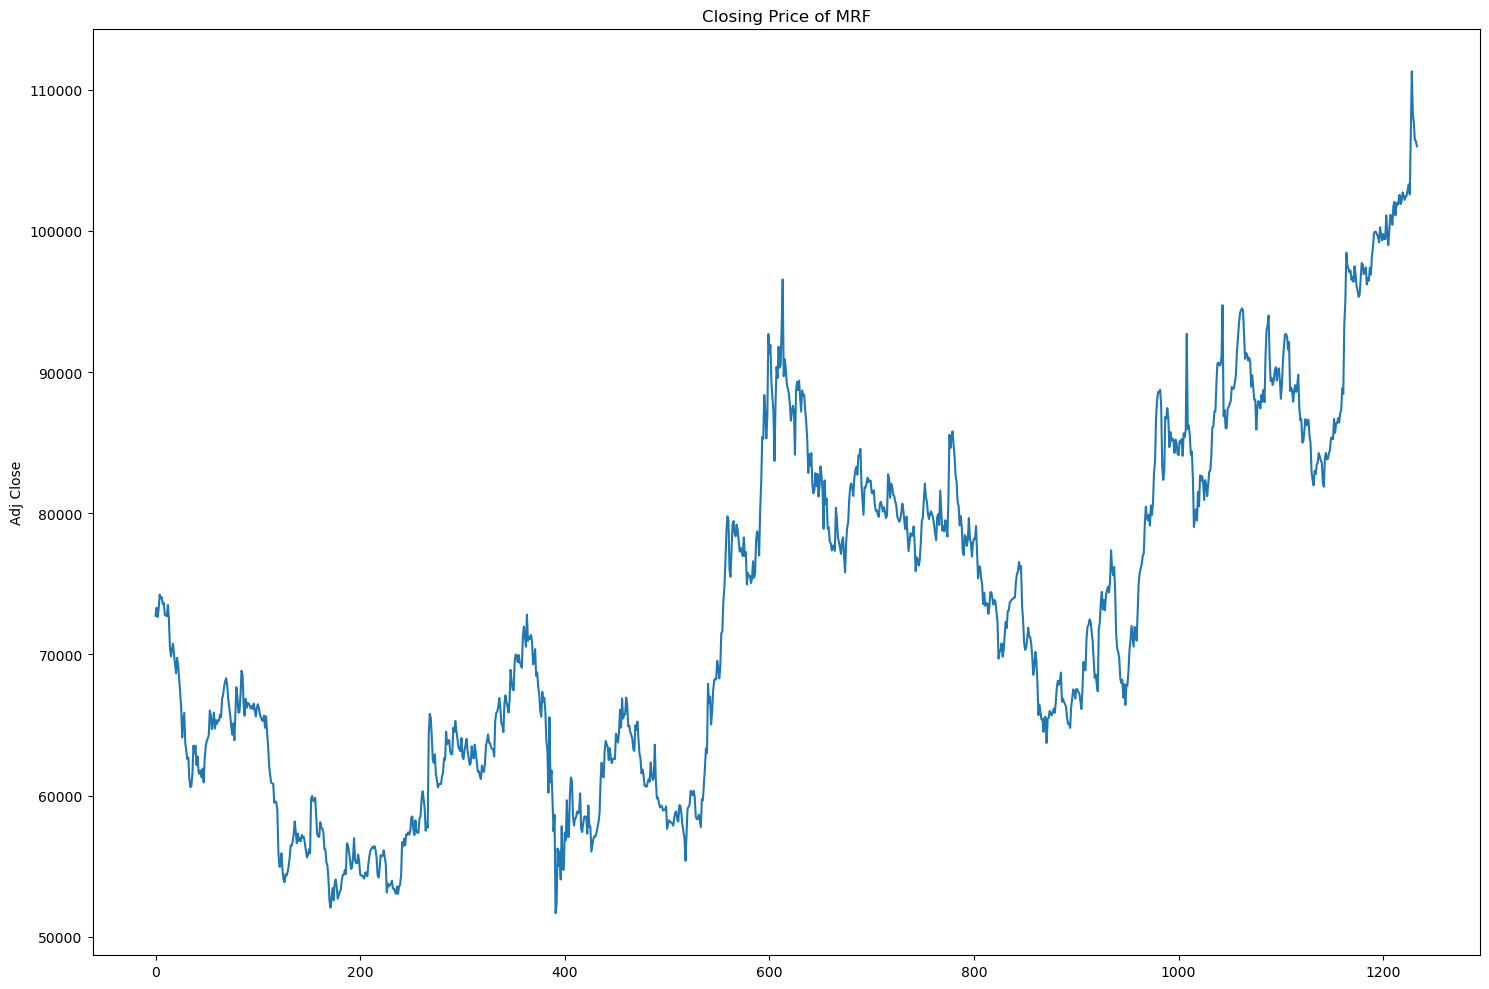

In [4]:
 #Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.tight_layout()
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of MRF")
    
plt.tight_layout()
plt.show()

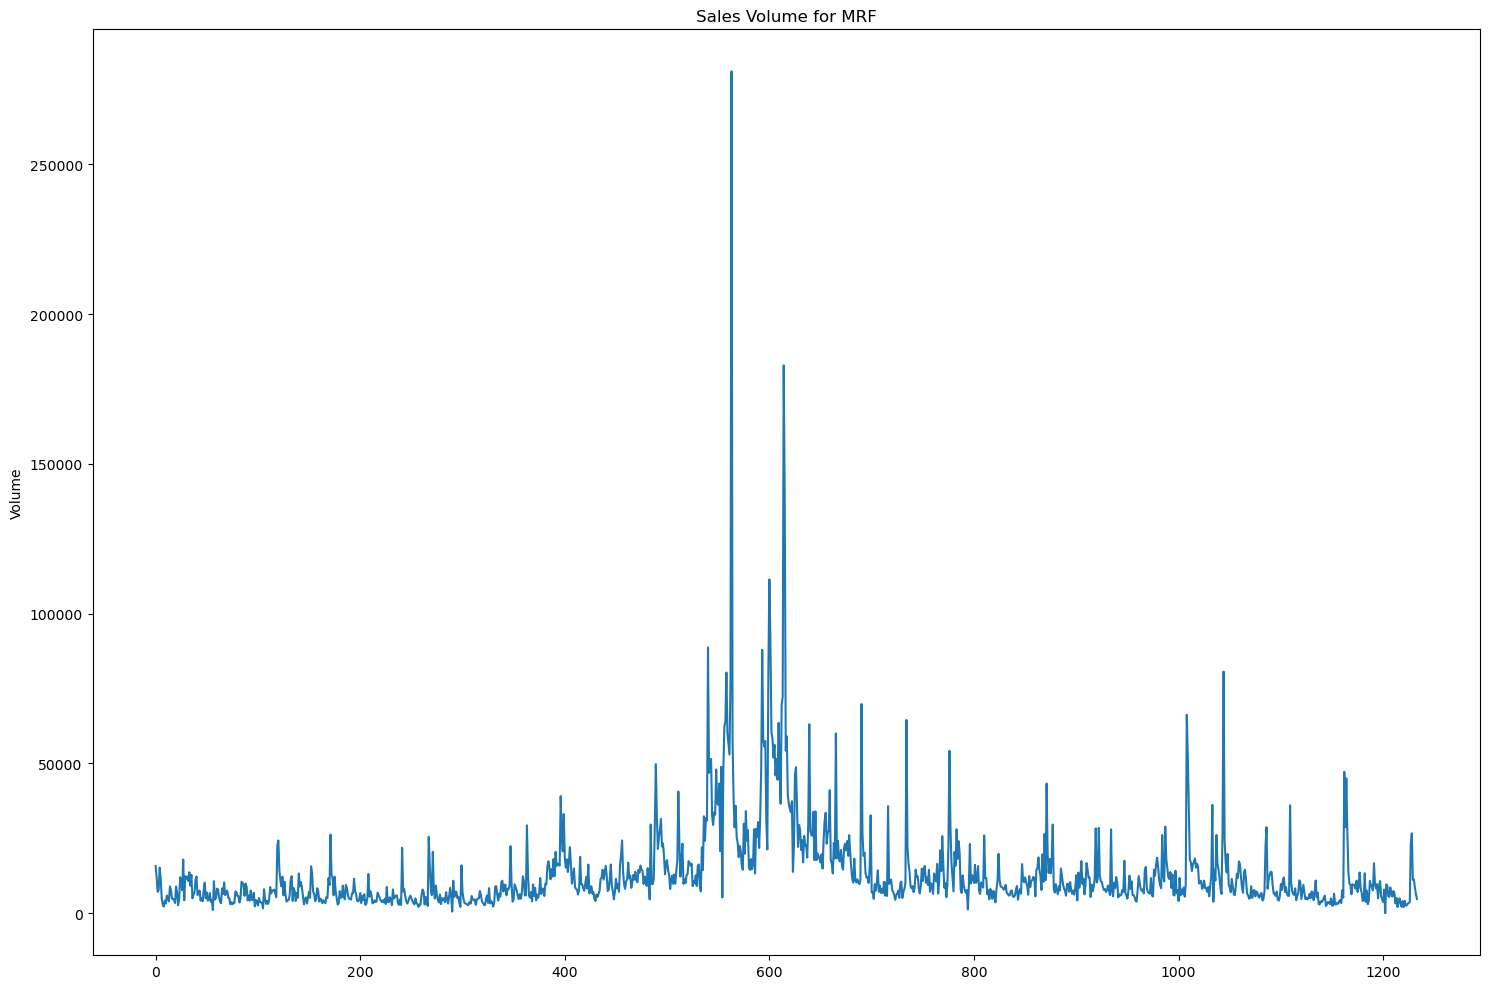

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for MRF")
    
plt.tight_layout()
plt.show()

In [8]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ma for 100 days', 'ma for 200 days'],
      dtype='object')


Moving Average


calculating few moving averages to be used

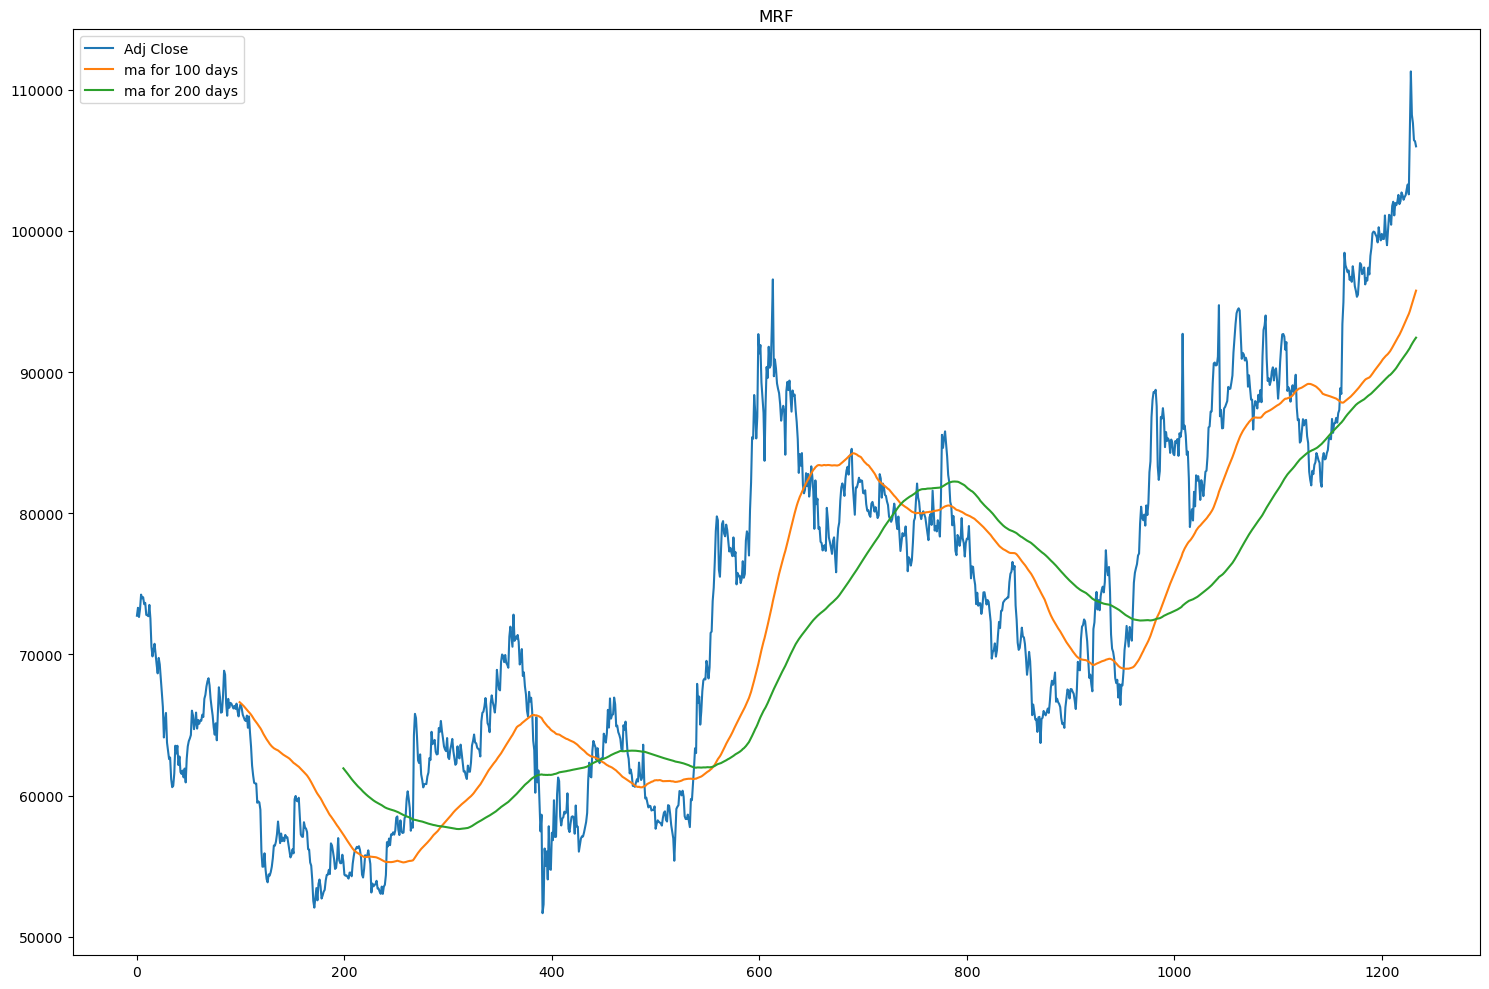

In [9]:
# List of moving average periods
ma_day = [100, 200]
for ma in ma_day:
    ma_column_name = f'ma for {ma} days'
    df[ma_column_name] = df['Adj Close'].rolling(window=ma).mean()  # Use 'window' to specify the rolling window size


# Create the subplot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

# Plot the data on the subplot
df[['Adj Close', 'ma for 100 days', 'ma for 200 days']].plot(ax=axes)
axes.set_title('MRF')

fig.tight_layout()
plt.show()

Relative Stability

 RSI indicator to predict whether a stock is overbought/oversold.

In [43]:
import plotly.graph_objects as go
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

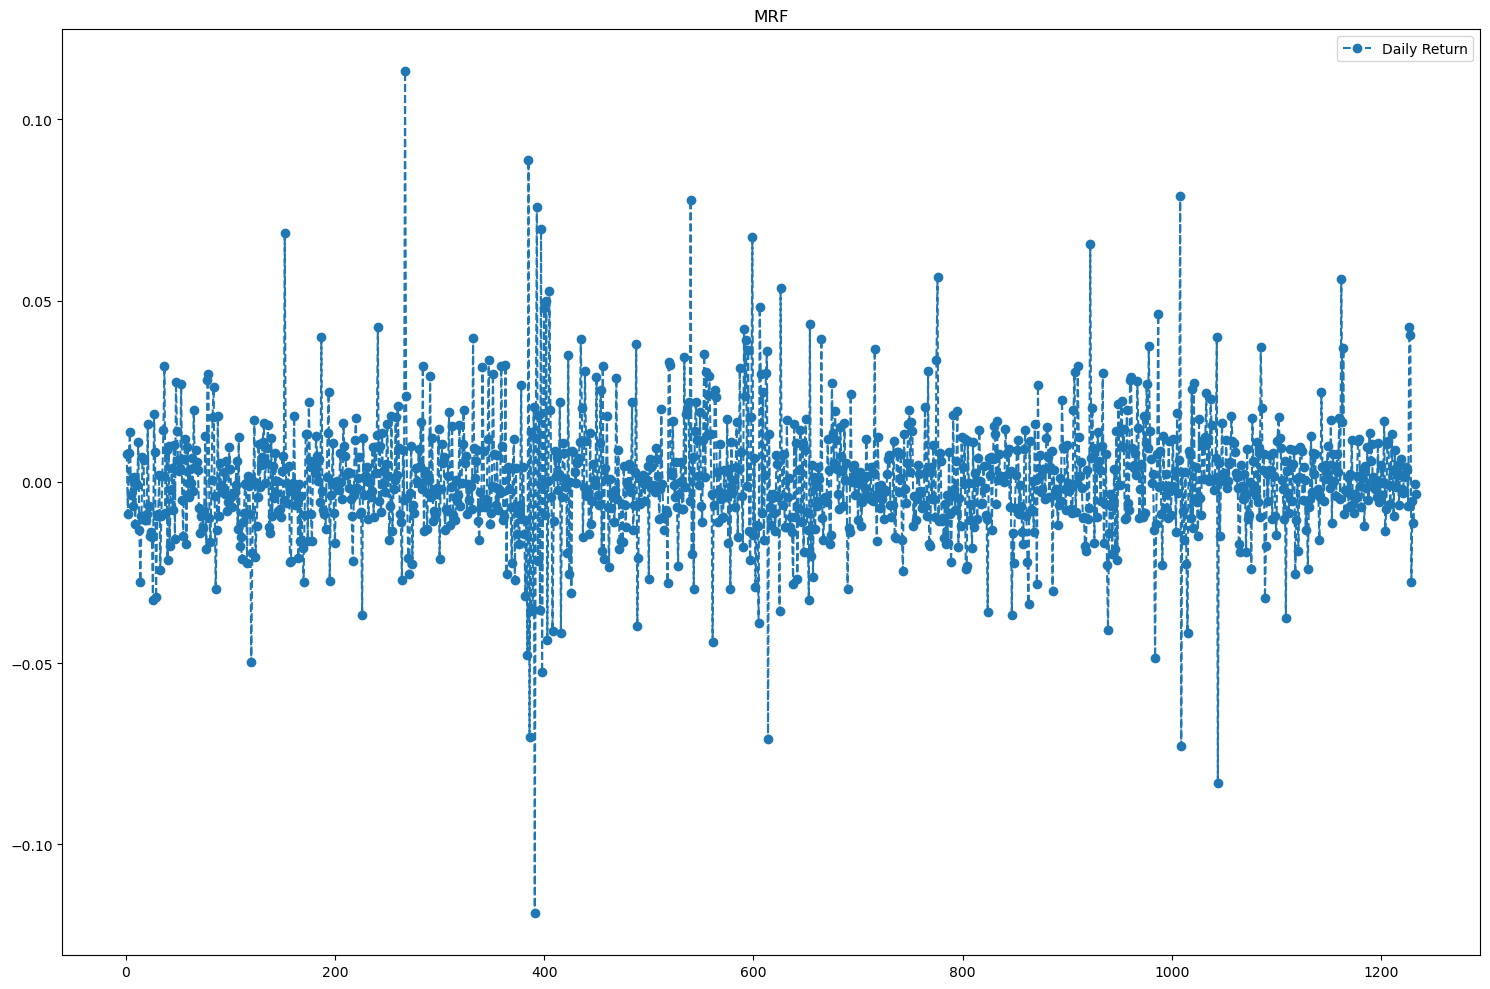

In [13]:
# We'll use pct_change to find the percent change for each day

df['Daily Return'] = df['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('MRF')

fig.tight_layout()
plt.show()

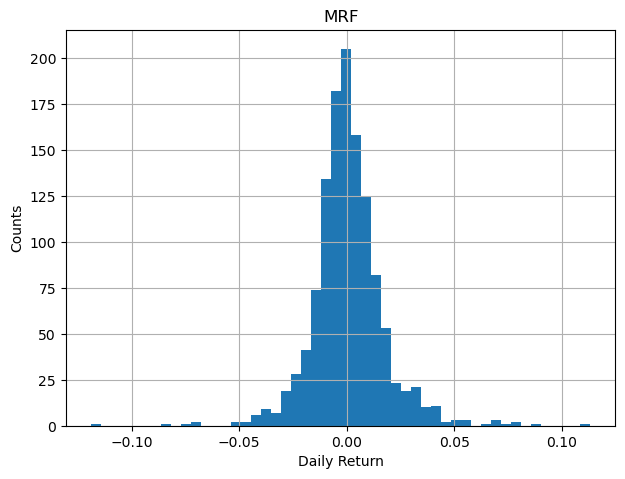

In [14]:
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'MRF')
    
plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = df['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

0         NaN
1    0.007724
2   -0.008874
3    0.007969
4    0.013751
Name: Adj Close, dtype: float64

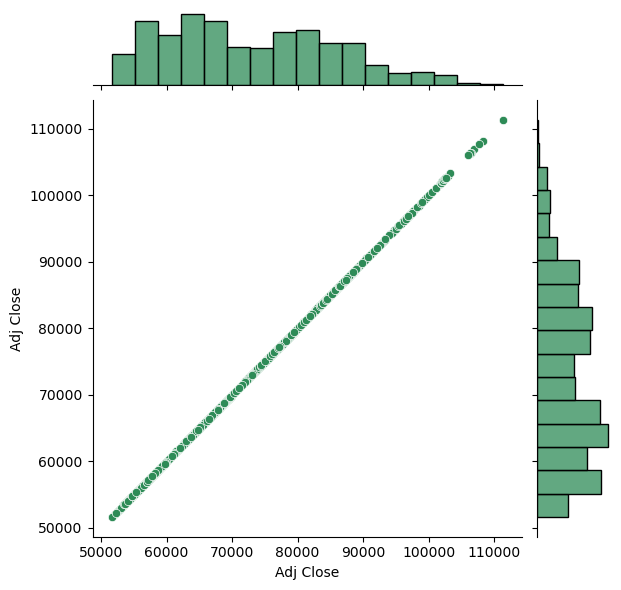

In [19]:
# Comparing MRF to itself should show a perfectly linear relationship
sns.jointplot(x='Adj Close', y='Adj Close', data=df, kind='scatter', color='seagreen')

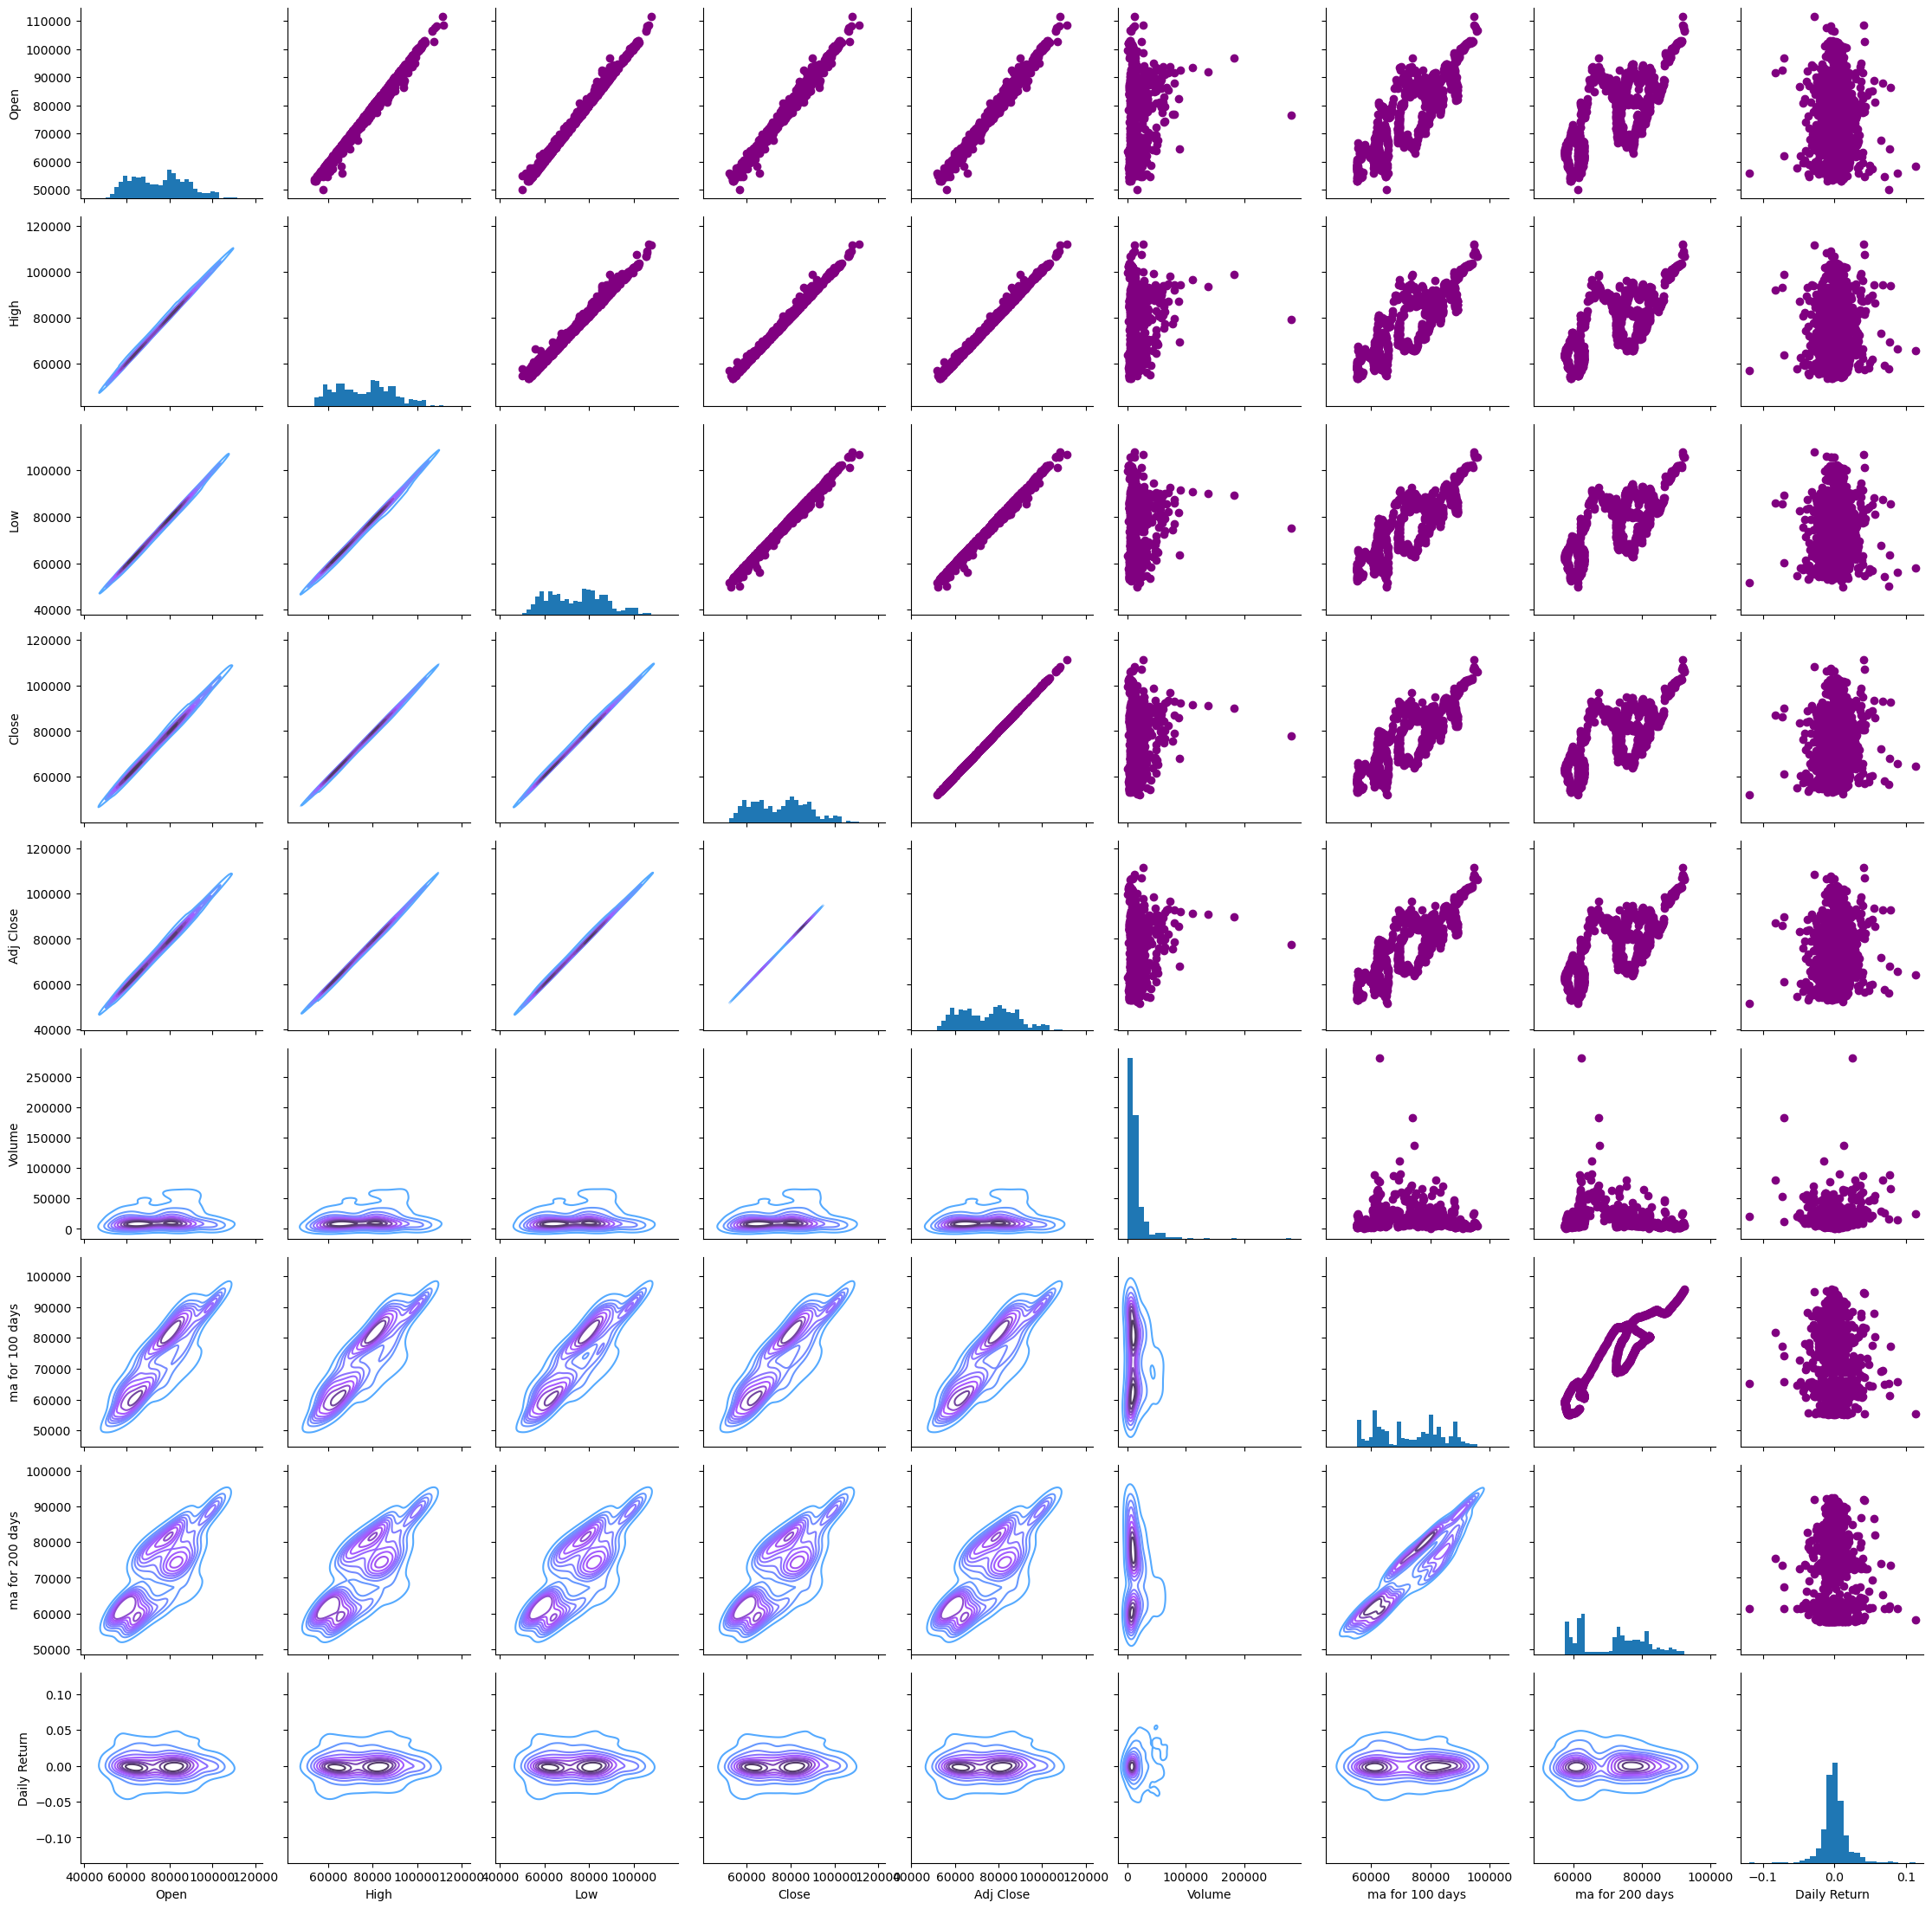

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

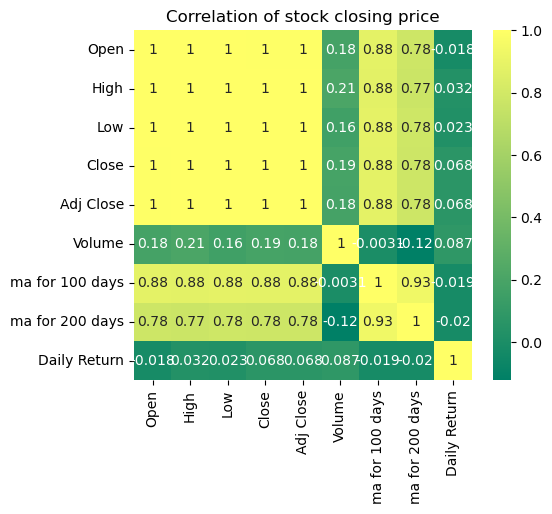

In [29]:
plt.figure(figsize=(12, 10))



plt.subplot(2, 2, 2)
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [30]:

# Show teh data
df

,Date,Open,High,Low,Close,Adj Close,Volume,ma for 100 days,ma for 200 days,Daily Return
0,2018-08-13,74489.898438,74489.898438,73150.000000,73253.953125,72737.625000,15760,NaN,NaN,NaN
1,2018-08-14,73503.953125,74300.000000,73400.000000,73819.796875,73299.468750,12251,NaN,NaN,0.007724
2,2018-08-16,73850.000000,74199.898438,73100.000000,73164.703125,72649.007813,7142,NaN,NaN,-0.008874
3,2018-08-17,73200.000000,73900.000000,73141.000000,73747.750000,73227.953125,7752,NaN,NaN,0.007969
4,2018-08-20,73999.000000,75089.703125,73500.000000,74761.898438,74234.937500,15186,NaN,NaN,0.013751
...,...,...,...,...,...,...,...,...,...,...
1229,2023-08-07,111472.000000,111500.000000,107912.351563,108216.250000,108216.250000,11175,94806.084297,91984.241563,-0.027676
1230,2023-08-08,108216.250000,108830.546875,105864.148438,107634.851563,107634.851563,11305,95053.036641,92107.686719,-0.005373
1231,2023-08-09,107634.851563,107999.000000,106000.000000,106416.898438,106416.898438,8607,95293.639844,92224.736133,-0.011316
1232,2023-08-10,106400.250000,106753.296875,105600.046875,106355.601563,106355.601563,6482,95537.475703,92336.376094,-0.000576


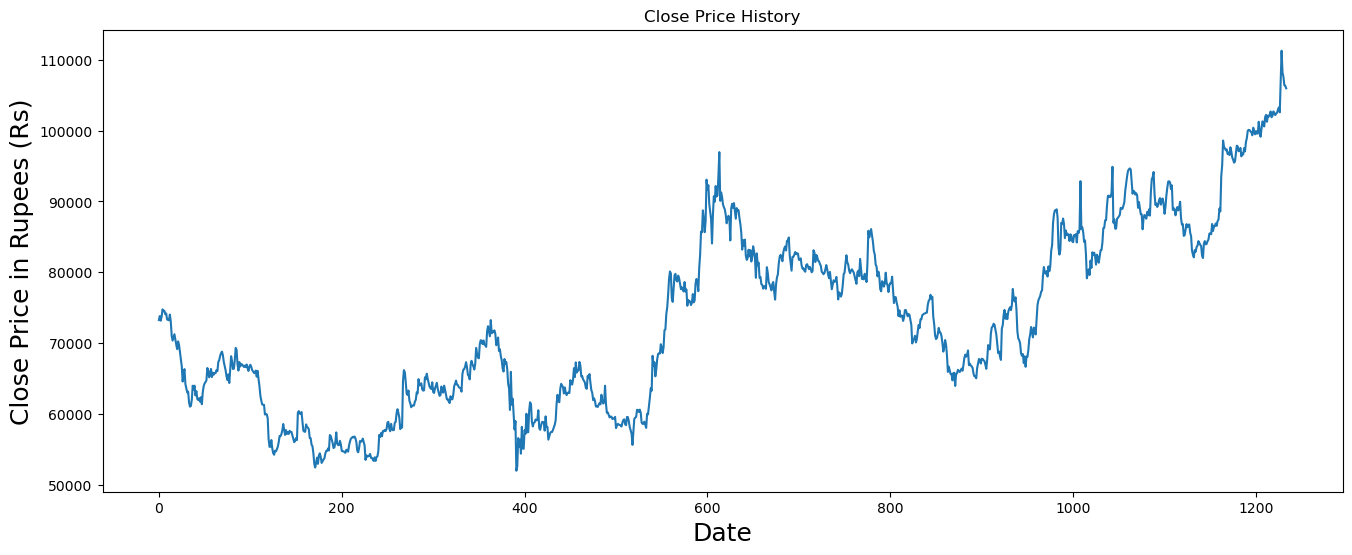

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in Rupees (Rs)', fontsize=18)
plt.show()

In [32]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1173

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.35875693],
       [0.36829476],
       [0.35725253],
       ...,
       [0.91774971],
       [0.91671649],
       [0.91054129]])

In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.35875693, 0.36829476, 0.35725253, 0.36708034, 0.38417477,
       0.37974258, 0.38099914, 0.37261159, 0.37422976, 0.35981793,
       0.35930382, 0.35816433, 0.37178315, 0.35513198, 0.32125153,
       0.30984677, 0.31790812, 0.32501133, 0.31244601, 0.30002397,
       0.28946885, 0.30802633, 0.30023888, 0.2825242 , 0.26654556,
       0.24903223, 0.21234698, 0.23278731, 0.2418541 , 0.20619206,
       0.196006  , 0.18634919, 0.18825648, 0.1623826 , 0.15257916,
       0.15424283, 0.16901542, 0.20242897, 0.19312277, 0.2024079 ,
       0.17918462, 0.18950632, 0.17077772, 0.16851902, 0.17254924,
       0.16440275, 0.17496049, 0.15831525, 0.18686329, 0.20163081,
       0.20798379, 0.21117635, 0.21528077, 0.24458898, 0.23907708,
       0.22233748, 0.22915157, 0.24230171, 0.22305301, 0.23348684])]
[0.22883130359663728]

[array([0.35875693, 0.36829476, 0.35725253, 0.36708034, 0.38417477,
       0.37974258, 0.38099914, 0.37261159, 0.37422976, 0.35981793,
       0.35930382, 0.35816433, 0.37

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1113/1113 [==============================] - 34s 27ms/step - loss: 0.0030


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 28ms/step


1548.0601690971052

C:\Users\Ram Suthar\AppData\Local\Temp\ipykernel_13400\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


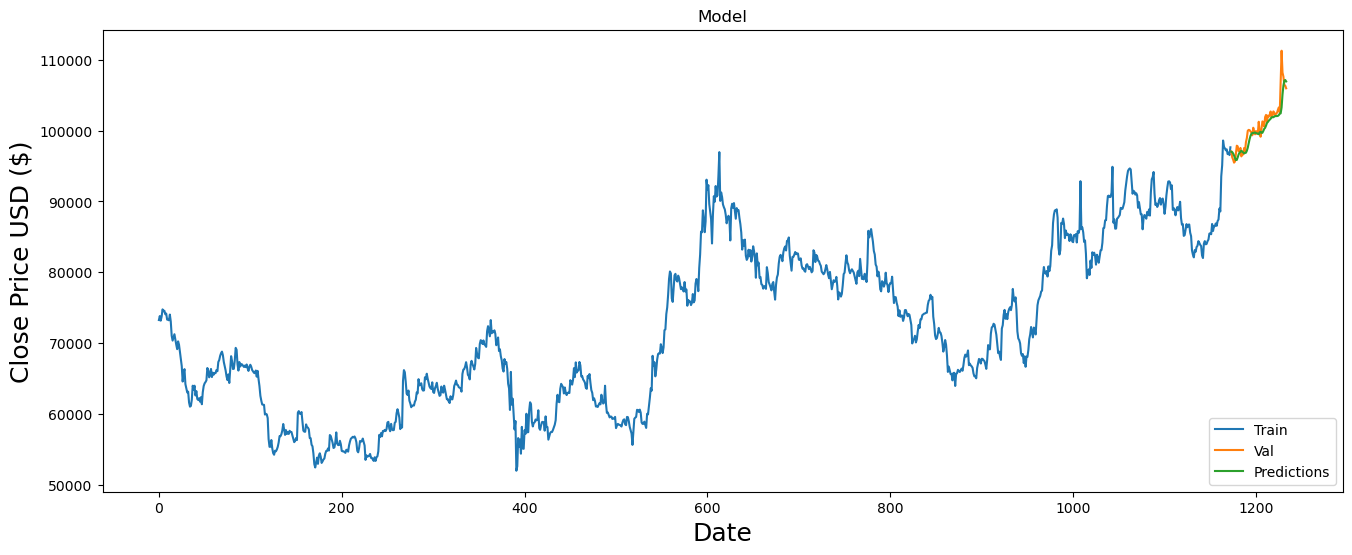

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Close,Predictions
1173,97060.703125,97030.906250
1174,96236.648438,96981.632812
1175,95911.453125,96777.851562
1176,95487.648438,96489.312500
1177,95640.296875,96138.609375
...,...,...
1229,108216.250000,105112.320312
1230,107634.851563,106374.515625
1231,106416.898438,107076.125000
1232,106355.601563,107160.500000
